<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./32_ltpy_AC_SAF_GOME-2_L3_case_study.ipynb"><< 32 - AC SAF - GOME-2 - Level 3 - Case study </a><span style="float:right;"><a href="./341_ltpy_Ozone_hole_case_study.ipynb">341 - 2019 Antarctic ozone hole case study >></a></span>

# 3.3 Case study - Arctic fires - Summer 2019

Summer 2019 was one of the hottest on record in the Arctic Circle, according to the Copernicus Climate Change service. In June and July there were more than 100 intense and long-lived wildfires in the Arctic Circle.

In late July wildfires raged for days in various regions of the Arctic and Siberia. These fires were unprecedented in duration, extent and emissions. Read more about the Artic fires [here](https://www.eumetsat.int/website/home/Images/ImageLibrary/DAT_4505427.html).

The dynamics and extent of the fires were monitored by different sensors and data. This notebook covers the following data products:

- [Sentinel-3 OLCI RGB](#sentinel3_olci)
- [CAMS GFAS Wildfire Radiative Power](#cams_gfas)
- [CAMS Total Column Carbon Monoxide](#cams_co)
- [Sentinel-5P Carbon Monoxide](#sentinel_5p)
- [GOME-2 Metop-A/B Aersol Absorbing Index](#gome2_aai)
- [IASI Total Column Carbon Monoxide](#iasi_co)

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb
from skimage import exposure

from netCDF4 import Dataset
import pandas as pd

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [2]:
from ipynb.fs.full.ltpy_functions import load_l2_data_xr, generate_masked_array, generate_xr_from_1D_vec, visualize_imshow, visualize_s5p_pcolormesh, visualize_l2, select_channels_for_rgb, normalize, visualize_s3_pcolormesh


<hr>

## <a id='sentinel3_olci'></a>Sentinel-3 OLCI Level 1 RGB

Sentinel-3 OLCI Level 1 RGB composites can highlight areas of smoke resulting from wildfires. Let's go through step by step to load Sentinel-3 OLCI Level 1 data and to build a RGB false color composite.

#### Load OLCI channel information into one xarray object with xarray's function `open_mfdataset`

You can load mulitple files at once with `open_mfdataset`. In the case of Sentinel-3 OLCI Level-1 data, you want to combine the data of all 21 channels into one xarray object. The structure of the single data files is equal, thus you can combine the data by coordinates by using the keyword argument `by_coords`.

In [3]:
olci_dir = './eodata/sentinel3/olci/2019/07/25/S3A_OL_1_EFR____20190725T023002_20190725T023302_20190726T055350_0179_047_203_1980_LN1_O_NT_002.SEN3/'


In [4]:
olci_xr_mf = xr.open_mfdataset(olci_dir+'*_radiance.nc', combine='by_coords')
olci_xr_mf

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4090)
Dimensions without coordinates: columns, rows
Data variables:
    Oa01_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa02_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa03_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa04_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa05_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa06_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa07_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa08_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa09_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa10_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa11_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa12_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa13_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa14_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa15_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa16_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa17_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa18_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa19_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa20_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
    Oa21_radiance  (rows, columns) float32 dask.array<chunksize=(4090, 4865), meta=np.ndarray>
Attributes:
    absolute_orbit_number:  17886
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                eosupport@copernicus.esa.int
    creation_time:          2019-07-26T05:53:50Z
    history:                  2019-07-26T05:53:50Z: PUGCoreProcessor /data/ip...
    institution:            LN1
    netCDF_version:         4.2 of Mar 13 2018 10:14:33 $
    product_name:           S3A_OL_1_EFR____20190725T023002_20190725T023302_2...
    references:             S3IPF PDS 004.1 - i2r2 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.08
    start_time:             2019-07-25T02:30:01.566131Z
    stop_time:              2019-07-25T02:33:01.487087Z
    title:                  OLCI Level 1b Product, Radiance Oa01 Data Set

#### Load the geo-coordinates and retrieve the data for `latitude` and `longitude`

You might want to georeference the resulting RGB image. Thus, you can already load the `geo_coordinates.nc` file and retrieve `latitude` and `longitude` information.

In [5]:
olci_geo_coords = xr.open_dataset(olci_dir+'geo_coordinates.nc')

lat = olci_geo_coords.latitude.data
lon = olci_geo_coords.longitude.data

#### Select the channels for the RGB composite

The function [select_channels_for_rgb](./ltpy_functions.ipynb#rgb_channels) selects the chosen channels from the loaded xarray object. In this case, we select the channels #17, #05 and #02. Those channels allow to build a false color composite that highlights healthy vegetation in red and also shows the fire smokes more prominently.

In [6]:
red, green, blue = select_channels_for_rgb(olci_xr_mf, 'Oa17_radiance', 'Oa05_radiance', 'Oa02_radiance')


#### Normalize the channels `red`, `green` and `blue`

The function [normalize](./ltpy_functions.ipynb#normalize) normalizes the data values within a range between 0 and 1.

In [7]:
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

#### Stack the RGB channels into a multi-dimensional array with `np.dstack`

In [8]:
rgb = np.dstack((redn, greenn, bluen))

#### Apply a histogram equalization 

A histogram equalization can improve the contrast of the resulting RGB composite. Thus, we use the `exposure` function from the ski-kit-learn library to equalize the image based on the data's histogram.

In [9]:
rgb = exposure.equalize_adapthist(rgb)

#### Map the rgb values onto a color array

If you want to visualize a georeferenced RGB image, you have to map the rgb values onto a color array with the following code:

In [10]:
mesh_rgb = rgb[:, :-1, :]
colorTuple = mesh_rgb.reshape((mesh_rgb.shape[0] * mesh_rgb.shape[1]), 3)
colorTuple = np.insert(colorTuple, 3, 1.0, axis=1)

#### Visualize the final RGB false color composite with the function `visualize_s3_pcolormesh`

Let's visualize the color array in a georeferenced way with matplotlib's function `pcolormesh`.

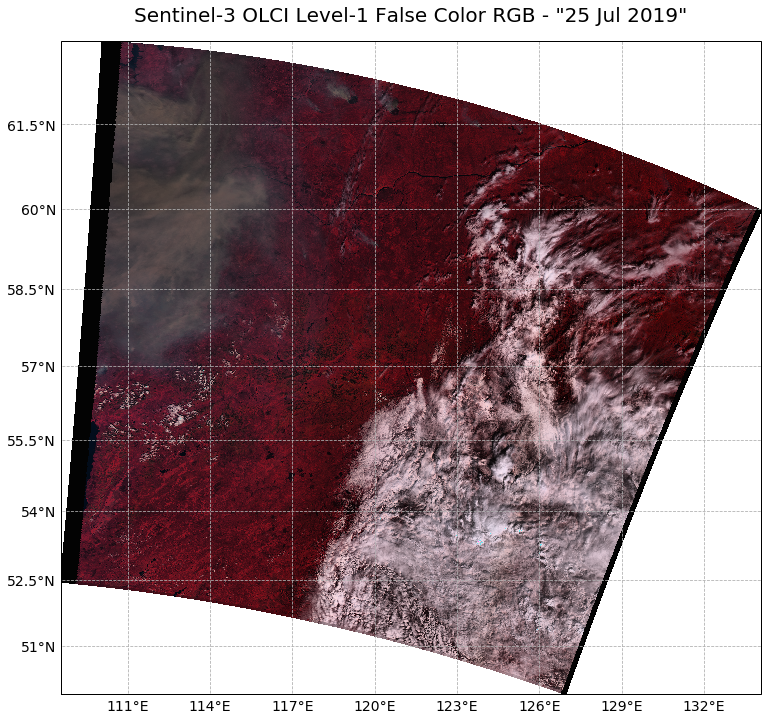

In [11]:
visualize_s3_pcolormesh(colorTuple, red, lat, lon, 'Sentinel-3 OLCI Level-1 False Color RGB - "25 Jul 2019"')

<br>

## <a id='cams_gfas'></a>CAMS GFAS Wildfire Radiative Power

#### Load the data with xarray's `open_dataset`

The dataset contains the `Wildfire radiative power` for 7 days, starting on 23 July 2019. You can extract the `frpfire` variable and also store longname and unit, which will be needed later for visualizing the data.

In [12]:
gfas_frpfire_xr = xr.open_dataset('./eodata/cams/gfas/2019/07/23/20190723_wildfire_radiative_power.nc')
gfas_frpfire_xr

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 -179.95 -179.85 -179.75 ... 179.85 179.95
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-07-23 2019-07-24 ... 2019-07-29
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-27 16:16:46 GMT by grib_to_netcdf-2.14.1: grib_to_n...

In [13]:
frpfire = gfas_frpfire_xr['frpfire']
longname = frpfire.long_name
unit = frpfire.units
frpfire[1,1,1]

<xarray.DataArray 'frpfire' ()>
array(-4.854537e-07, dtype=float32)
Coordinates:
    longitude  float32 -179.85
    latitude   float32 89.85
    time       datetime64[ns] 2019-07-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

#### Subset the data for Eastern Arctic region with `xarray.where` function

The wildfires occured over Siberia and the Arctic. Let's create a geographical subset, to highlight the fire occurrences for this specific region. You can use xarray's function `where` to do so.

In [14]:
latmin=-10
latmax=90
lonmin=40
lonmax=180
frpfire_subset = frpfire.where((frpfire.latitude < latmax) & (frpfire.latitude > latmin) & (frpfire.longitude < lonmax) & (frpfire.longitude > lonmin),drop=True)
frpfire_subset

<xarray.DataArray 'frpfire' (time: 7, latitude: 1000, longitude: 1400)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 40.05 40.15 40.25 ... 179.75 179.85 179.95
  * latitude   (latitude) float32 89.95 89.85 89.75 89.65 ... -9.75 -9.85 -9.95
  * time       (time) datetime64[ns] 2019-07-23 2019-07-24 ... 2019-07-29
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

#### Set negative values to `NaN`

The raw data can contain negative values, which you want to flag.

In [15]:
frpfire_subset.values[frpfire_subset.values<0]=np.nan

#### Visualise the Wildfire radiative power with the `visualize_s5p_pcolormesh`  function

Let's visualize the first day of the data set. You can change the value of time in the function below to visualize the `Wildfire Radiative Power` for subsequent days.

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f4fa4621b70>)

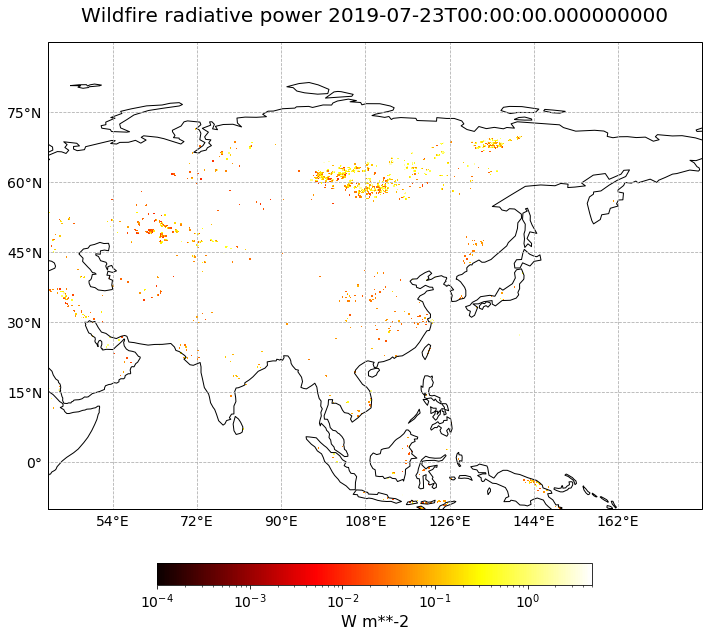

In [16]:
visualize_s5p_pcolormesh(frpfire_subset.isel(time=0).data, frpfire_subset.longitude.data, frpfire_subset.latitude.data, ccrs.PlateCarree(), 'hot', unit, longname + ' ' + str(frpfire_subset.isel(time=0).time.data), 0.0001, 5, lonmin, lonmax, latmin, latmax, log=True, set_global=False)
    

<br>

## <a id='cams_co'></a>CAMS Total column of carbon monoxide

#### Load the data with xarray's function `open_dataset`

You can see that the dataset contains the `Carbon monoxide` values for six days, starting on 23 July 2019. You can extract the `tcco` variable as well as information on title (long name) and unit. These will be required for the visualization at a later stage.

In [17]:
cams_co_tc_xr = xr.open_dataset('./eodata/cams/nrt/co/2019/07/23/20190723_fc_tc_co.nc')
cams_co_tc_xr

<xarray.Dataset>
Dimensions:    (latitude: 901, longitude: 1800, time: 6)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
  * latitude   (latitude) float32 90.0 89.8 89.6 89.4 ... -89.6 -89.8 -90.0
  * time       (time) datetime64[ns] 2019-07-23 2019-07-24 ... 2019-07-28
Data variables:
    tcco       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-27 16:09:08 GMT by grib_to_netcdf-2.14.1: grib_to_n...

In [18]:
tcco = cams_co_tc_xr['tcco']
tcco
longname = tcco.long_name
unit = tcco.units

#### Create a geographic subset for the area where the fires occured

You can create a geographic subset with xarray's function `where`.

In [19]:
latmin=-10
latmax=90
lonmin=40
lonmax=180
tcco_subset = tcco.where((tcco.latitude < latmax) & (tcco.latitude > latmin) & (tcco.longitude < lonmax) & (tcco.longitude > lonmin),drop=True)
tcco_subset

<xarray.DataArray 'tcco' (time: 6, latitude: 499, longitude: 699)>
array([[[0.00069466, 0.00069466, 0.00069466, ..., 0.00069955,
         0.00069955, 0.00069955],
        [0.00069099, 0.00069099, 0.00069099, ..., 0.0007023 ,
         0.000702  , 0.000702  ],
        [0.00068549, 0.00068549, 0.00068549, ..., 0.00070627,
         0.00070627, 0.00070627],
        ...,
        [0.00059259, 0.00058679, 0.00058251, ..., 0.00046149,
         0.00045844, 0.00045538],
        [0.00059045, 0.00058526, 0.0005819 , ..., 0.00046057,
         0.00045813, 0.00045507],
        [0.00059015, 0.00058526, 0.0005819 , ..., 0.00046057,
         0.00045782, 0.00045507]],

       [[0.00076373, 0.00076373, 0.00076373, ..., 0.00076831,
         0.00076862, 0.00076862],
        [0.00076312, 0.00076312, 0.00076312, ..., 0.0007677 ,
         0.0007677 , 0.0007677 ],
        [0.00076189, 0.00076189, 0.0007622 , ..., 0.00076648,
         0.00076648, 0.00076648],
        ...,
        [0.00059687, 0.00059534, 0.00059168, ..., 0.00048013,
         0.00048013, 0.00048044],
        [0.00059962, 0.0005984 , 0.00059504, ..., 0.00047952,
         0.00048013, 0.00048074],
        [0.00060237, 0.00060115, 0.00059748, ..., 0.0004786 ,
         0.00047922, 0.00047983]],

       [[0.0007512 , 0.0007512 , 0.0007512 , ..., 0.00073867,
         0.00073836, 0.00073836],
        [0.00075334, 0.00075334, 0.00075334, ..., 0.00073531,
         0.00073531, 0.000735  ],
        [0.00075609, 0.00075609, 0.00075609, ..., 0.00073011,
         0.00073011, 0.00073011],
        ...,
        [0.0006421 , 0.00064149, 0.00064088, ..., 0.00045935,
         0.00045263, 0.0004456 ],
        [0.00064057, 0.00063935, 0.00063965, ..., 0.00046485,
         0.00045874, 0.00045171],
        [0.00063935, 0.00063813, 0.00063843, ..., 0.00047066,
         0.00046485, 0.00045782]],

       [[0.00075884, 0.00075884, 0.00075884, ..., 0.00075425,
         0.00075425, 0.00075425],
        [0.00075914, 0.00075914, 0.00075914, ..., 0.00075364,
         0.00075364, 0.00075364],
        [0.00075914, 0.00075914, 0.00075914, ..., 0.00075242,
         0.00075242, 0.00075272],
        ...,
        [0.00061918, 0.00061337, 0.0006094 , ..., 0.00047249,
         0.00047371, 0.00047524],
        [0.0006201 , 0.00061368, 0.00060971, ..., 0.00046944,
         0.00047035, 0.00047188],
        [0.00062101, 0.0006149 , 0.00061062, ..., 0.00046669,
         0.0004676 , 0.00046882]],

       [[0.00099201, 0.00099201, 0.00099201, ..., 0.00102685,
         0.00102685, 0.00102685],
        [0.00098895, 0.00098926, 0.00098956, ..., 0.00103999,
         0.00103999, 0.00103968],
        [0.00098467, 0.00098498, 0.00098528, ..., 0.00105985,
         0.00105985, 0.00105954],
        ...,
        [0.00064027, 0.00063538, 0.00063232, ..., 0.00047677,
         0.00047585, 0.00047524],
        [0.00064149, 0.0006366 , 0.00063385, ..., 0.00047708,
         0.00047616, 0.00047555],
        [0.0006424 , 0.00063782, 0.00063476, ..., 0.0004783 ,
         0.00047738, 0.00047647]],

       [[0.00095748, 0.00095748, 0.00095748, ..., 0.00092997,
         0.00092997, 0.00092967],
        [0.00096481, 0.00096481, 0.00096511, ..., 0.00091744,
         0.00091744, 0.00091744],
        [0.00097581, 0.00097612, 0.00097642, ..., 0.0008988 ,
         0.0008988 , 0.00089849],
        ...,
        [0.00063751, 0.00063507, 0.00063385, ..., 0.00047219,
         0.00047188, 0.00047188],
        [0.00063568, 0.00063354, 0.00063263, ..., 0.00047188,
         0.00047158, 0.00047158],
        [0.00063415, 0.00063201, 0.0006311 , ..., 0.00047188,
         0.00047158, 0.00047127]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 40.2 40.4 40.6 40.8 ... 179.4 179.6 179.8
  * latitude   (latitude) float32 89.8 89.6 89.4 89.2 ... -9.2 -9.4 -9.6 -9.8
  * time       (time) datetime64[ns] 2019-07-23 2019-07-24 ... 2019-07-28
Attributes:
    units:      kg m**-2
    long_name:  Total column Carbon monoxide

#### Visualize the Carbon monoxide total column with the function `visualize_s5p_pcolormesh`

Let's visualize the first day (23 July 2019) of the dataset with the help of the function [visualize_s5p_pcolormesh](./ltpy_functions.ipynb#visualize_s5p_pcolormesh).

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f4fa44cba58>)

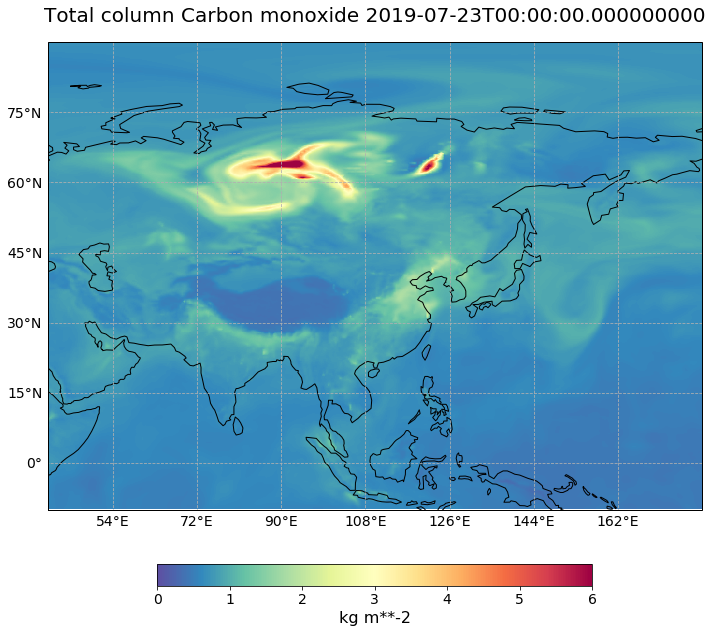

In [20]:
visualize_s5p_pcolormesh(tcco_subset.isel(time=0).data*1000, tcco_subset.longitude.data, tcco_subset.latitude.data, ccrs.PlateCarree(), 'Spectral_r', unit, longname + ' ' + str(tcco_subset.isel(time=0).time.data), 0, 6, lonmin, lonmax, latmin, latmax, log=False, set_global=False)


<br>

## <a id='sentinel_5p'></a> Sentinel-5p Carbon Monoxide

#### Load the data with xarray's `open_mfdataset`

You can load all the datasets available for one day into one xarray object by using `scanline` as concatanation dimension.

In [21]:
s5p_mf = xr.open_mfdataset('./eodata/sentinel5p/co/2019/07/23/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf


<xarray.Dataset>
Dimensions:                                (corner: 4, ground_pixel: 215, layer: 50, scanline: 6490, time: 1)
Coordinates:
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * time                                   (time) datetime64[ns] 2019-07-23
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * layer                                  (layer) float32 49500.0 ... 500.0
  * scanline                               (scanline) float64 0.0 ... 3.244e+03
    latitude                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    longitude                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
Data variables:
    delta_time                             (time, scanline) datetime64[ns] dask.array<chunksize=(1, 3245), meta=np.ndarray>
    time_utc                               (time, scanline) object dask.array<chunksize=(1, 3245), meta=np.ndarray>
    qa_value                               (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 3245, 215), meta=np.ndarray>

You are interested in the `carbonmonoxide_total_column` variable. You can extract the variable together with geographic coordinates and other information that might be helpful for the plot.

In [22]:
co = s5p_mf.carbonmonoxide_total_column[0,:,:]
lat = co.latitude
lon = co.longitude

unit = co.units
long_name = co.long_name
vmin = 0.01
vmax = 1

latmin=-10
latmax=90
lonmin=40
lonmax=180

#### Visualize the Carbon Monoxide Total Column with the function `visualize_s5p_pcolormesh`

The function takes latitude and longitude bounds and creates a geographical subset while plotting.

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f4fa42c2748>)

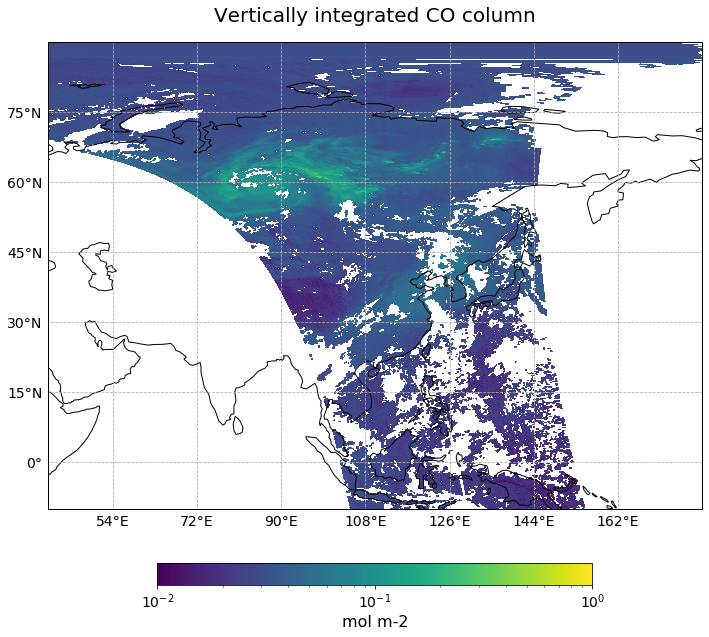

In [23]:
visualize_s5p_pcolormesh(co, lon, lat, ccrs.PlateCarree(), 'viridis', unit, long_name, vmin, vmax, lonmin, lonmax, latmin, latmax, log=True, set_global=False)


<br>

## <a id='gome2_aai'></a>GOME-2 Metop-B Absorbing Aerosol Index (AAI)

#### Load the data with the function `load_l2_data_xr`

Let's load the data file from 23 July 2019 with the function [load_l2_data_xr](./ltpy_functions.ipynb#load_l2_data_xr).

In [24]:
directory_aai_2b = './eodata/gome2/offline/2b/2019/07/23/'
aai_b_da_mf = load_l2_data_xr(directory_aai_2b, 'DATA', 'AAI','LatitudeCenter','LongitudeCenter',2,'-', 'Absorbing Aerosol Index')
aai_b_da_mf

<xarray.DataArray 'AAI' (ground_pixel: 2142208)>
array([-999., -999., -999., ..., -999., -999., -999.], dtype=float32)
Coordinates:
    latitude      (ground_pixel) float32 46.5238 46.851673 ... -69.07906
    longitude     (ground_pixel) float32 -64.23352 -64.454346 ... 49.443115
  * ground_pixel  (ground_pixel) MultiIndex
  - x             (ground_pixel) int64 0 0 0 0 0 0 0 ... 255 255 255 255 255 255
  - y             (ground_pixel) int64 0 1 2 3 4 5 6 ... 561 562 563 564 565 566
Attributes:
    long_name:  Absorbing Aerosol Index
    units:      -

#### Load SunGlintFlag

The `SunGlintFlag` information should be used to flag out not valid entries. You can load the `SunGlintFlag` information as well with the function [load_l2_data_xr](./ltpy_functions.ipynb#load_l2_data_xr).

In [25]:
sg_b_da_mf = load_l2_data_xr(directory_aai_2b, 'DATA', 'SunGlintFlag','LatitudeCenter','LongitudeCenter',2,'-', 'Sun Glint')
sg_b_da_mf

<xarray.DataArray 'SunGlintFlag' (ground_pixel: 2142208)>
array([-999, -999, -999, ..., -999, -999, -999], dtype=int32)
Coordinates:
    latitude      (ground_pixel) float32 46.5238 46.851673 ... -69.07906
    longitude     (ground_pixel) float32 -64.23352 -64.454346 ... 49.443115
  * ground_pixel  (ground_pixel) MultiIndex
  - x             (ground_pixel) int64 0 0 0 0 0 0 0 ... 255 255 255 255 255 255
  - y             (ground_pixel) int64 0 1 2 3 4 5 6 ... 561 562 563 564 565 566
Attributes:
    long_name:  Sun Glint
    units:      -

#### Mask the data array with the `SunGlintFlag` information

The function [generate_masked_array](./ltpy_functions.ipynb#generate_masked_array) allows you to mask out the non-valid data entries based on the loaded sun glint flag array. The mask removes all entries where the sun glint flag equals 0.

In [26]:
aai_masked = generate_masked_array(aai_b_da_mf, sg_b_da_mf, 0, '=')
aai_masked

<xarray.DataArray (ground_pixel: 836603)>
array([0.5772649 , 0.5756186 , 0.23175514, ..., 0.31253183, 0.85698164,
       0.99602187], dtype=float32)
Coordinates:
    latitude      (ground_pixel) float32 56.08949 57.007153 ... -58.360085
    longitude     (ground_pixel) float32 -72.435036 -73.48014 ... 51.039883
  * ground_pixel  (ground_pixel) MultiIndex
  - x             (ground_pixel) int64 0 0 0 0 0 0 0 ... 255 255 255 255 255 255
  - y             (ground_pixel) int64 29 32 34 36 37 38 ... 531 533 534 535 536
Attributes:
    long_name:  Absorbing Aerosol Index
    units:      -

#### Visualize the data in `Orthographic` projection with the function `visualize_l2`

The function [visualize_l2](./ltpy_functions.ipynb#visualize_l2) allows to change between different projections. The `ccrs.Orthographic()` projection is advantageous to highlight some phenomena close to the poles.

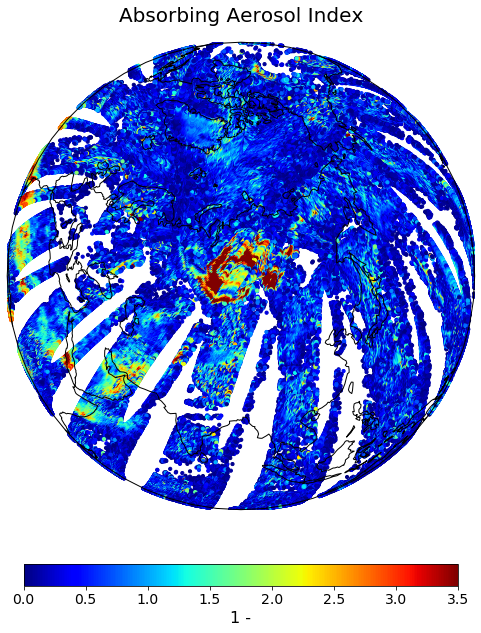

In [27]:
visualize_l2(aai_masked,1,ccrs.Orthographic(90,60),0,3.5,10,'jet', aai_masked.units, aai_masked.long_name, False)

<br>

## <a id='iasi_co'></a>IASI Total Column Carbon Monoxide

#### Load the data file with `pandas`

IASI Total Column Carbon Monoxide data are disseminated in `.txt` format. You can easily load the .txt file with `pandas`, using an empty string as seperator.

Pandas' function `.head()` shows you the first entries of the loaded file.

In [28]:
iasi_file = './eodata/iasi/txt/co/2b/2019/07/23/iasi_CO_LATMOS_ULB_metopb_20190723_v20151001.txt'


In [29]:
iasi_co = pd.read_csv(iasi_file, sep=" ", header = None)
iasi_co.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-5.28564,-46.54831,20190723,258,131.61,0,1,0,0,0,...,1.967916,1.981760,1.927175,1.811883,1.661120,1.486958,1.294062,1.093281,0.894955,-0.061292
1,-5.03226,-46.60137,20190723,258,131.46,1,1,0,0,0,...,1.892960,1.873258,1.791627,1.660121,1.500409,1.325970,1.138707,0.948803,0.766456,-0.042892
2,-5.13056,-47.08466,20190723,258,131.06,2,1,0,0,1,...,2.180583,2.258604,2.246180,2.152696,2.011326,1.838382,1.635759,1.414180,1.182802,-0.108790
3,-5.02433,-45.42467,20190723,258,132.54,0,1,0,0,0,...,2.064783,2.093467,2.059924,1.965963,1.823733,1.650130,1.454150,1.245359,1.032613,-0.111512
4,-4.79073,-45.47406,20190723,258,132.41,1,1,0,0,0,...,1.991248,1.993741,1.934715,1.820194,1.668977,1.496648,1.306471,1.108603,0.910080,-0.080651


#### Load data into a xarray with the function `generate_xr_from_1D_vec`

The IASI Carbon Monoxide data are stored in column 20 of the data file. You can use the function [generate_xr_from_1D_vec](./ltpy_functions.ipynb#generate_xr_from_1D_vec) to load the `Total Column Carbon Monoxide` information into a xarray.

The data holds a `Super Quality Flag`, which should be masked out. The quality flag is stored in column 15. You can load the flag information into a xarray.

In [30]:
iasi_co_da = generate_xr_from_1D_vec(iasi_co,0, 1, iasi_co[20], 'co', 'IASI Carbon Monoxide Total Column', 1, 'molec./cm-2')

In [31]:
iasi_co_qf_da = generate_xr_from_1D_vec(iasi_co,0, 1, iasi_co[15], 'qf', 'Super Quality Flag', 1, '-')

#### Mask the Total Column Carbon Monoxide data with the `Super Quality Flag`

The function [generate_masked_array](./ltpy_functions.ipynb#generate_masked_array) allows you to flag out the quality flags. If the quality flag is 0, the data values are flagged.

In [32]:
iasi_co_masked = generate_masked_array(iasi_co_da,iasi_co_qf_da,0,'=')
iasi_co_masked

<xarray.DataArray (ground_pixel: 413517)>
array([1.860367e+18, 1.897558e+18, 2.009047e+18, ..., 1.471667e+18,
       1.455511e+18, 1.435054e+18])
Coordinates:
    latitude   (ground_pixel) float64 -5.286 -5.032 -5.024 ... 71.52 71.47 71.26
    longitude  (ground_pixel) float64 -46.55 -46.6 -45.42 ... -45.23 -45.12
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

#### Visualize the masked dataset with the function `visualize_l2`

You can visualize the IASI Total Column Carbon Monoxide data again with the function [visualize_l2](./ltpy_functions.ipynb#visualize_l2) and an `Orthographic()` projection and focus on the region over Siberia.

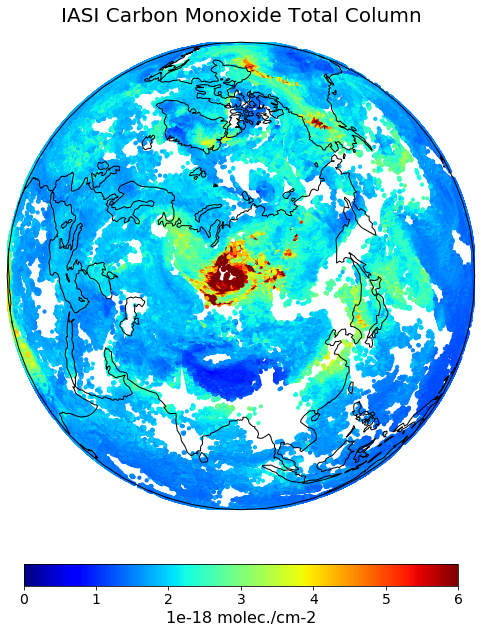

In [33]:
visualize_l2(iasi_co_masked, 1e-18,ccrs.Orthographic(90,60), 0, 6, 10, 'jet', iasi_co_masked.units, iasi_co_masked.long_name,  )

<br>

Let's also visualize the same example, but in a `PlateCarree()` projection.

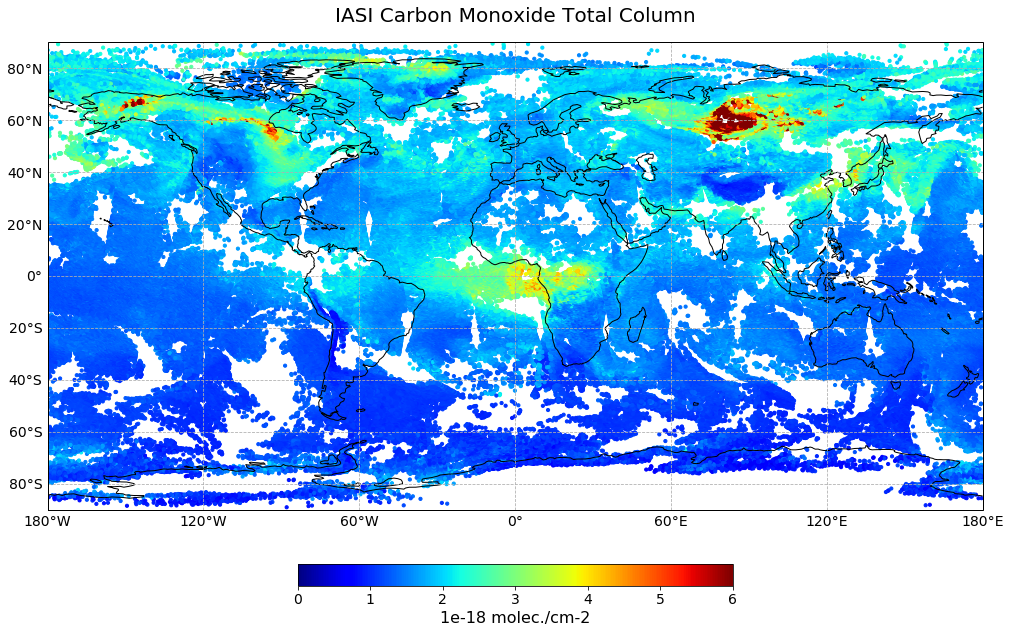

In [34]:
visualize_l2(iasi_co_masked, 1e-18,ccrs.PlateCarree(), 0, 6, 10, 'jet', iasi_co_masked.units, iasi_co_masked.long_name)

<br>

<a href="./32_ltpy_AC_SAF_GOME-2_L3_case_study.ipynb"><< 32 - AC SAF - GOME-2 - Level 3 - Case study </a><span style="float:right;"><a href="./341_ltpy_Ozone_hole_case_study.ipynb">341 - 2019 Antarctic ozone hole case study >></a></span>

<hr>

<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:training@eumetsat.int>Contact</a></span></p>